In [1]:
import numpy as np
import pandas as pd
import os
import h5py
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from src.data import Dataset

In [2]:
# Load Data
data = Dataset('data/Galaxy10_DECals.h5')
images, labels = data.load_data()

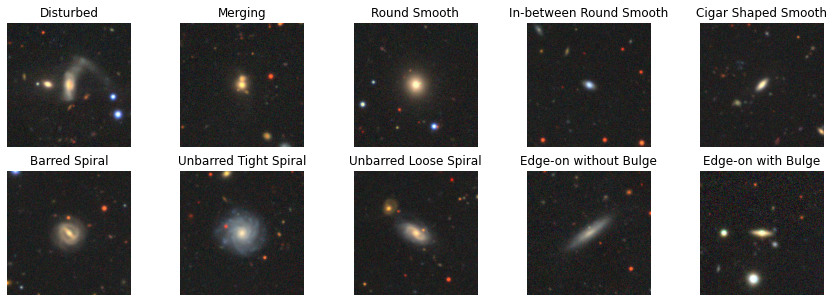

In [3]:
data.plot_few()

In [4]:
labels

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [5]:
images.shape

(17736, 256, 256, 3)

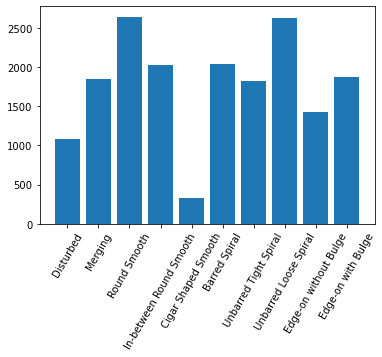

In [6]:
labs, counts = np.unique(labels, return_counts=True)
fig, ax = plt.subplots()
ax.bar(labs, counts, tick_label = data.label_names)
ax.set_xticklabels(data.label_names, rotation=60);

In [7]:
# Split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(images, cat_labels, test_size=0.1, stratify=labels)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, stratify=labels)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((15962, 256, 256, 3), (15962,), (1774, 256, 256, 3), (1774,))

In [9]:
def count_class(y, ax, xtick_labels = data.label_names):
    labels, count = np.unique(y, return_counts = True)
    ax.bar(labels, count, tick_label = xtick_labels)
    ax.set_xticklabels(xtick_labels, rotation=60);

Text(0.5, 1.0, 'Test Set')

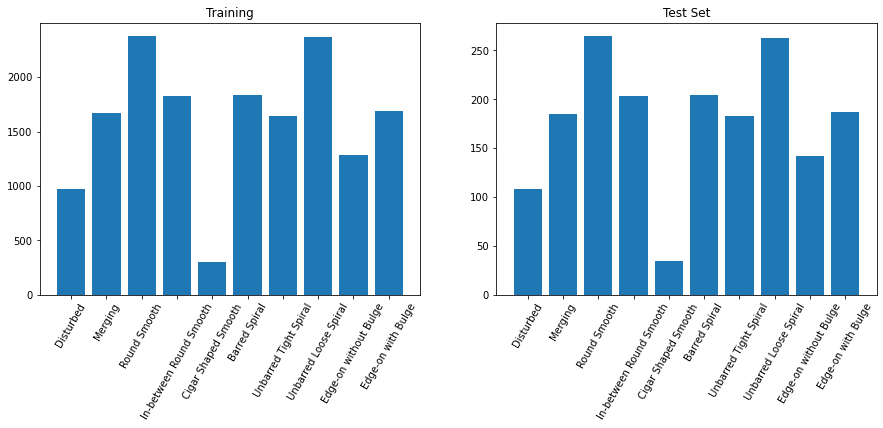

In [10]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
for ax,y in zip(axs.flatten(),[y_train, y_test]):
    count_class(y, ax)
axs[0].set_title('Training')
axs[1].set_title('Test Set')

## Convolutional Neural Network

In [11]:
# Prepare data for neural network ingest
train_images, test_images = data.prep_data(X_train,[128,128]), data.prep_data(X_test,[128,128])

In [12]:
in_shape = (64,64,3)

In [193]:
def create_model(kernel_size = (5,5), input_shape = (64,64,3), drop_out = 0):
    # Layer 1
    model = keras.models.Sequential([
        keras.layers.Conv2D(8, kernel_size, activation='relu',
                            input_shape=in_shape, padding = "same"),
        keras.layers.MaxPooling2D((2, 2))
    ])
    #
    #model.add(keras.layers.Conv2D(8, kernel_size, activation = 'relu', padding = 'same'))
    #model.add(keras.layers.MaxPool2D(2,2))
    
    #
    model.add(keras.layers.Conv2D(16, kernel_size, activation = 'relu', padding = 'same'))
    model.add(keras.layers.MaxPool2D(2,2))
    #model.add(keras.layers.Dropout(drop_out))
    # Layer 2
    model.add(keras.layers.Conv2D(16, kernel_size, activation = 'relu', padding = 'same'))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Dropout(drop_out))
    model.add(keras.layers.Flatten())
    # Layer 3
    model.add(keras.layers.Dense(64, activation = 'relu'))
    #model.add(keras.layers.Dropout(drop_out))
    # Layer 4
    model.add(keras.layers.Dense(10,  activation = "softmax"))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

#model = KerasClassifier(build_fn=create_model, epochs=10, kernel_size = (3,3))
model = create_model((3,3), in_shape, 0.05)

In [34]:
in_size = (64,64,3)

def create_CNN4(kernel_size=(3,3), in_shape=(64,64,3), drop_out=0.2, l2_reg=0):
    # Layer 1
    CNN3 = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size, activation='relu',
                        input_shape=in_shape, padding = "same"),
    keras.layers.MaxPooling2D((2, 2))
    ])

    # Layer 2
    CNN3.add(keras.layers.Conv2D(32, kernel_size, activation = 'relu', padding = 'same'))
    CNN3.add(keras.layers.MaxPool2D(2,2))
    #model.add(keras.layers.Dropout(drop_out))
    # Layer 3
    CNN3.add(keras.layers.Conv2D(64, kernel_size, activation = 'relu', padding = 'same', kernel_regularizer = keras.regularizers.l2(l2_reg)))
    CNN3.add(keras.layers.MaxPool2D(2,2))

    CNN3.add(keras.layers.Conv2D(64, kernel_size, activation = 'relu', padding = 'same', kernel_regularizer = keras.regularizers.l2(l2_reg)))
    CNN3.add(keras.layers.MaxPool2D(2,2))
    CNN3.add(keras.layers.Dropout(drop_out))
    CNN3.add(keras.layers.Flatten())
    # Layer 4
    CNN3.add(keras.layers.Dense(256, activation = 'relu', kernel_regularizer = keras.regularizers.l2(l2_reg)))
    #model.add(keras.layers.Dropout(drop_out))
    # Layer 5
    CNN3.add(keras.layers.Dense(10,  activation = "softmax"))

    CNN3.compile(optimizer= keras.optimizers.Adam(lr=0.0001),
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

    return CNN3

#CNN4 = KerasClassifier(build_fn=create_CNN4, epochs=20, kernel_size = (3,3))

In [373]:
def create_CNN6(kernel_size=(3,3), in_shape=(64,64,3), drop_out=0.0, l2_reg=0):
    # Layer 1
    CNN6 = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size, activation='relu',
                        input_shape=in_shape, padding = "same"),
    keras.layers.MaxPooling2D((2, 2))
    ])
    # Layer 2
    CNN6.add(keras.layers.Conv2D(64, kernel_size, activation = 'relu', padding = 'same', kernel_regularizer = keras.regularizers.l2(l2_reg)))
    CNN6.add(keras.layers.MaxPool2D(2,2))
    # Layer 3
    CNN6.add(keras.layers.Conv2D(64, kernel_size, activation = 'relu', padding = 'same', kernel_regularizer = keras.regularizers.l2(l2_reg)))
    CNN6.add(keras.layers.MaxPool2D(2,2))
    CNN6.add(keras.layers.Dropout(drop_out))
    CNN6.add(keras.layers.Flatten())
    # Layer 4
    CNN6.add(keras.layers.Dense(128, activation = 'relu', kernel_regularizer = keras.regularizers.l2(l2_reg)))
    #model.add(keras.layers.Dropout(drop_out))
    # Layer 5
    CNN6.add(keras.layers.Dense(10,  activation = "softmax"))

    CNN6.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

    return CNN6

In [184]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 64, 64, 8)         224       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 8, 8, 16)        

In [228]:
param_grid = dict(drop_out=[0.05, 0.2, 0.3], epochs=[20], l2_reg = [0.001, 0.01, 0.1])
grid = GridSearchCV(estimator=CNN4, param_grid=param_grid, n_jobs=-1, verbose=4, return_train_score=True, cv=3)
grid_result = grid.fit(train_images, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Epoch 1/20
499/499 [==============================] - 29s 55ms/step - loss: 1.9109 - accuracy: 0.3250
Epoch 2/20
499/499 [==============================] - 23s 45ms/step - loss: 1.4907 - accuracy: 0.4926
Epoch 3/20
499/499 [==============================] - 23s 46ms/step - loss: 1.3321 - accuracy: 0.5675
Epoch 4/20
499/499 [==============================] - 24s 48ms/step - loss: 1.2348 - accuracy: 0.6084
Epoch 5/20
499/499 [==============================] - 25s 49ms/step - loss: 1.1621 - accuracy: 0.6355
Epoch 6/20
499/499 [==============================] - 24s 48ms/step - loss: 1.1082 - accuracy: 0.6613
Epoch 7/20
499/499 [==============================] - 25s 50ms/step - loss: 1.0711 - accuracy: 0.6734
Epoch 8/20
499/499 [==============================] - 25s 49ms/step - loss: 1.0360 - accuracy: 0.6854
Epoch 9/20
499/499 [==============================] - 25s 49ms/step - loss: 1.0145 - accuracy: 0.6896
Epoch 10/20
499/499 [=

In [230]:
grid_result.best_params_

{'drop_out': 0.2, 'epochs': 20, 'l2_reg': 0.001}

In [231]:
grid_result.best_score_

0.7205235362052917

In [207]:
history = model.fit(train_images, y_train, epochs=20, verbose=1, validation_data=(test_images, y_test))

Epoch 1/20
499/499 [==============================] - 15s 30ms/step - loss: 0.8208 - accuracy: 0.7197 - val_loss: 1.1498 - val_accuracy: 0.6240
Epoch 2/20
499/499 [==============================] - 14s 27ms/step - loss: 0.8109 - accuracy: 0.7248 - val_loss: 1.1557 - val_accuracy: 0.6291
Epoch 3/20
499/499 [==============================] - 14s 27ms/step - loss: 0.8014 - accuracy: 0.7252 - val_loss: 1.1858 - val_accuracy: 0.6167
Epoch 4/20
 41/499 [=>............................] - ETA: 13s - loss: 0.7423 - accuracy: 0.7485

KeyboardInterrupt: 

In [225]:
CNN4_history = CNN3.fit(train_images, y_train, epochs=20, verbose=1, validation_data=(test_images, y_test))

Epoch 1/20
499/499 [==============================] - 27s 52ms/step - loss: 1.8450 - accuracy: 0.3624 - val_loss: 1.5897 - val_accuracy: 0.4363
Epoch 2/20
499/499 [==============================] - 24s 48ms/step - loss: 1.4403 - accuracy: 0.5203 - val_loss: 1.3412 - val_accuracy: 0.5800
Epoch 3/20
499/499 [==============================] - 24s 49ms/step - loss: 1.2783 - accuracy: 0.5915 - val_loss: 1.2408 - val_accuracy: 0.6206
Epoch 4/20
499/499 [==============================] - 25s 49ms/step - loss: 1.1868 - accuracy: 0.6338 - val_loss: 1.1612 - val_accuracy: 0.6488
Epoch 5/20
499/499 [==============================] - 25s 49ms/step - loss: 1.1430 - accuracy: 0.6420 - val_loss: 1.1272 - val_accuracy: 0.6725
Epoch 6/20
499/499 [==============================] - 25s 49ms/step - loss: 1.0818 - accuracy: 0.6685 - val_loss: 1.1036 - val_accuracy: 0.6607
Epoch 7/20
499/499 [==============================] - 25s 49ms/step - loss: 1.0468 - accuracy: 0.6805 - val_loss: 1.0608 - val_accuracy:

In [170]:
model.evaluate(test_images, y_test)

56/56 [==============================] - 0s 6ms/step - loss: 0.9205 - accuracy: 0.7182


[0.9205369353294373, 0.7181510925292969]

In [17]:
def show_final_history(history):
    # Store values that will be used for plotting
    min_loss = min(history.history['val_loss'])
    max_acc = max(history.history['val_accuracy'])
    text_xcoord = max(history.epoch)
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    ax[0].set_title('Loss')
    ax[0].plot(history.epoch, history.history['loss'], label='Train loss')
    ax[0].plot(history.epoch, history.history['val_loss'], label='Validation loss')
    ax[0].axhline(min_loss, color = 'r', label='Min validation value')
    ax[0].annotate(str(np.round(min_loss,3)), (text_xcoord - 1.5, min_loss - 0.05))
    ax[1].set_title('Accuracy')
    ax[1].plot(history.epoch, history.history['accuracy'], label='Train accuracy')
    ax[1].plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy')
    ax[1].axhline(max_acc, color = 'r', label='Max validation value')
    ax[1].annotate(str(np.round(max_acc,3)), (text_xcoord - 1.5, max_acc + 0.01))
    ax[0].legend(fontsize=12)
    ax[1].legend(fontsize=12)

#show_final_history(history)
#plt.savefig('imgs/train_val_plots_64in_CNN4_20epochs.png')

In [232]:
ypred = grid_result.best_estimator_.predict(test_images)

/Users/jordyns/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [233]:
accuracy_score(y_test, ypred)

0.7361894024802705

In [102]:
y_pred = model.predict_classes(test_images)

/Users/jordyns/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


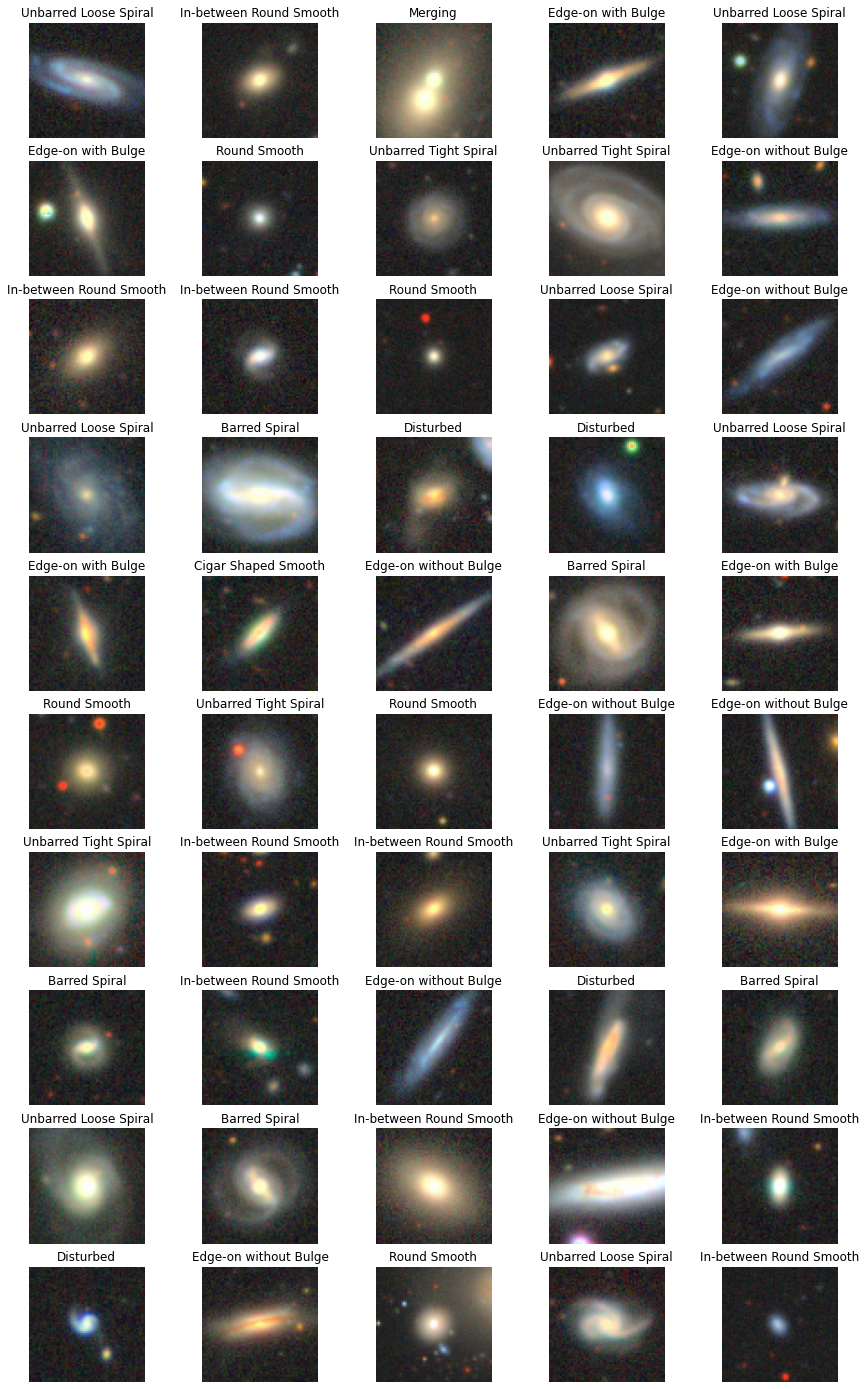

In [19]:
fig, axs = plt.subplots(10,5, figsize=(15,25), sharex=True, sharey=True)

for idx, plot in enumerate(axs.flatten()):
    #class_idx = np.argwhere(labels==idx)[0][0]
    plot.imshow(train_images[idx])
    plot.set_title(data.class_dict[y_train[idx]])
    plot.axis('off')

In [234]:
cm = confusion_matrix(y_test, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

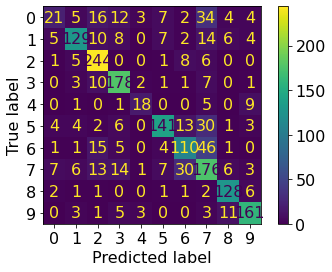

In [350]:
disp.plot()

In [301]:
# Save the model
from datetime import datetime
saved_model_path = "./saved_models/CNN5_aug_50epochs_64in{}.h5".format(datetime.now().strftime("%Y%m%d"))
CNN.save(saved_model_path)

In [98]:
loaded_model = keras.models.load_model(saved_model_path)

In [99]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 16)        1216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [100]:
loaded_model.evaluate(test_images, y_test)

56/56 [==============================] - 1s 12ms/step - loss: 2.0487 - accuracy: 0.6505


[2.048696994781494, 0.6505073308944702]

In [103]:
y_compare = loaded_model.predict_classes(test_images)

/Users/jordyns/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
cm_2 = confusion_matrix(y_test, y_compare)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp_2.plot()

## Examine misclassifications

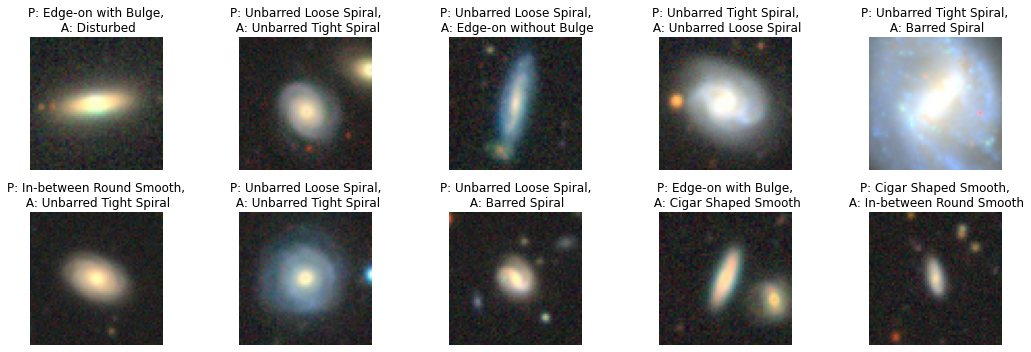

In [262]:
miss_mask = ~(ypred == y_test)
misses, missed_pred, missed_actual = test_images[miss_mask], ypred[miss_mask], y_test[miss_mask]


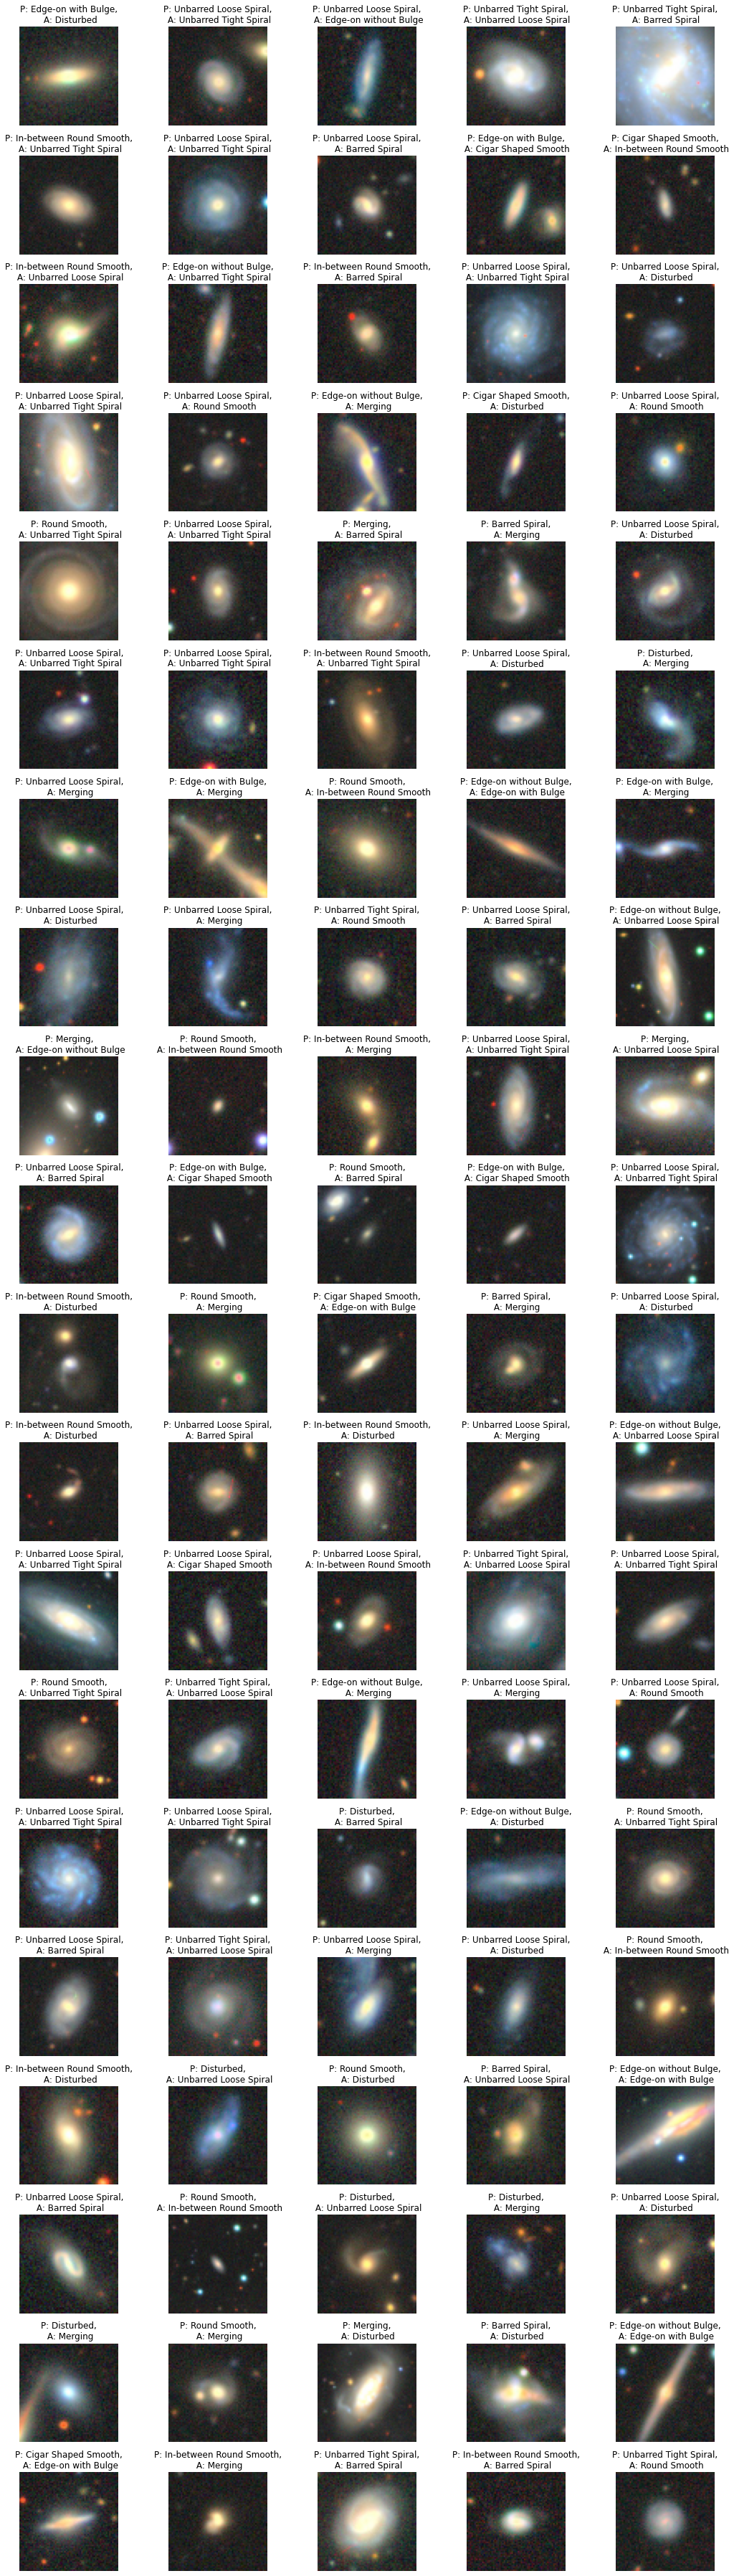

In [269]:
num=100
fig, axs = plt.subplots(int(num/5),5,figsize = (15,int((5*num)/10)))
for miss,ax,miss_pred, miss_actual in zip(misses[:num], axs.flatten(), missed_pred[:num], missed_actual[:num]):
    ax.imshow(miss)
    ax.set_title(f'P: {class_dict[miss_pred]},\n A: {class_dict[miss_actual]}')
    ax.axis('off')
plt.tight_layout()

## Data Augmentation

In [374]:
#CNN6 = create_CNN6(drop_out=0)
CNN6 = create_CNN6(drop_out=0)

In [35]:
CNN5 = create_CNN4((3,3), (64,64,3), drop_out=0)

In [23]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=45,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

In [ ]:
#datagen.fit(train_images, augment=True)
# fits the model on batches with real-time data augmentation:
CNN5_aug = CNN5.fit(datagen.flow(train_images, y_train, batch_size=32),
         validation_data=(test_images, y_test),
         steps_per_epoch=len(train_images) // 32, epochs=50)


Epoch 1/50
498/498 [==============================] - 40s 79ms/step - loss: 1.9143 - accuracy: 0.2974 - val_loss: 1.5987 - val_accuracy: 0.4453
Epoch 2/50
498/498 [==============================] - 39s 79ms/step - loss: 1.5656 - accuracy: 0.4372 - val_loss: 1.3817 - val_accuracy: 0.5135
Epoch 3/50
498/498 [==============================] - 40s 80ms/step - loss: 1.4419 - accuracy: 0.4811 - val_loss: 1.3463 - val_accuracy: 0.5225
Epoch 4/50
498/498 [==============================] - 38s 77ms/step - loss: 1.3550 - accuracy: 0.5159 - val_loss: 1.2354 - val_accuracy: 0.5643
Epoch 5/50
498/498 [==============================] - 38s 77ms/step - loss: 1.3053 - accuracy: 0.5367 - val_loss: 1.2207 - val_accuracy: 0.5609
Epoch 6/50
498/498 [==============================] - 38s 76ms/step - loss: 1.2638 - accuracy: 0.5519 - val_loss: 1.1332 - val_accuracy: 0.6240
Epoch 7/50
498/498 [==============================] - 38s 77ms/step - loss: 1.2319 - accuracy: 0.5718 - val_loss: 1.0910 - val_accuracy:

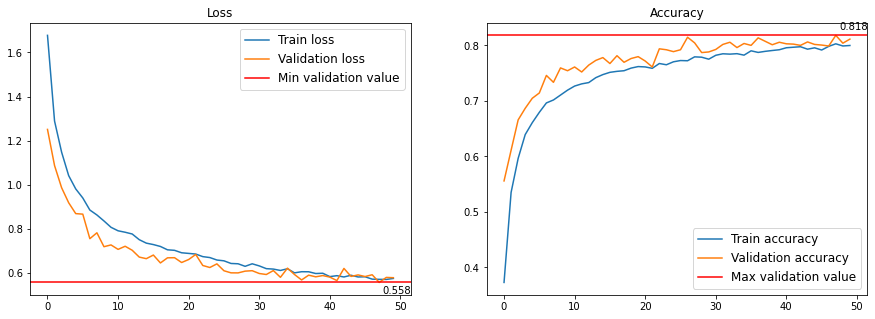

In [27]:
show_final_history(CNN5_aug)

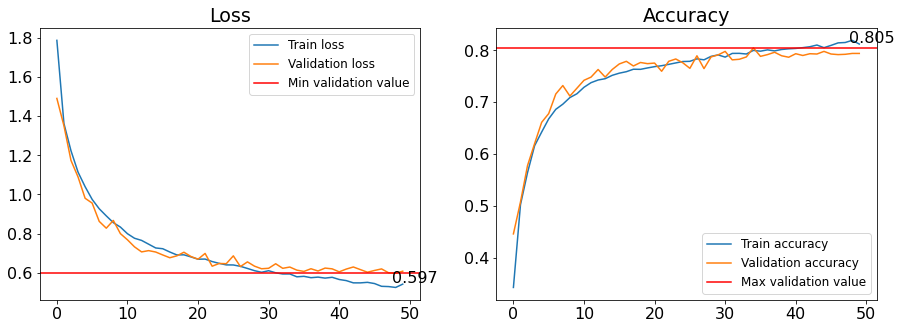

In [353]:
show_final_history(CNN6_aug)

In [340]:
plt.rcParams.update({'font.size': 16})

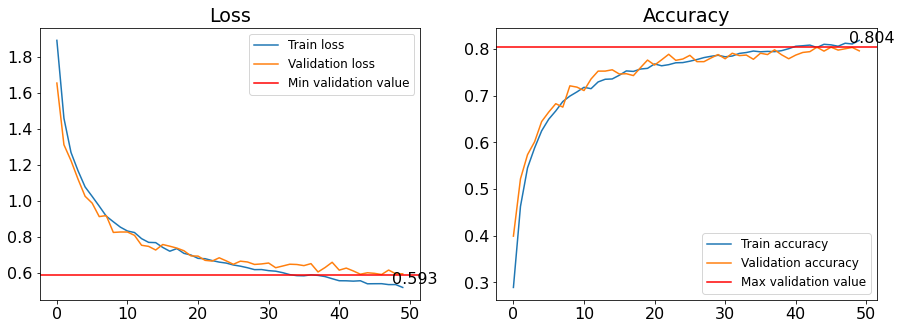

In [372]:
show_final_history(CNN6_lg_aug)

## Transfer Learning

In [20]:
base_model = keras.applications.VGG16(include_top=True, weights=None, input_shape=(64,64,3), classes=10, classifier_activation='softmax')

In [21]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [15]:
def add_new_last_layer(base_model, num_classes=10, drop_out=0.5):
    """Add last layer to the convnet
    Args:
    base_model: keras model excluding top
    num_classes: # of classes
    Returns:
    new keras model with last layer
    """
    # Get the output shape of the model's last layer
    x = layers.Flatten()(base_model.output)
    # Convert final MxNxC tensor output into a 1xC tensor where C is the # of channels.
    #x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(1024, activation='relu')(x) 
    x = keras.layers.Dropout(drop_out)(x)
    predictions = keras.layers.Dense(num_classes, activation='softmax')(x)

    model = keras.models.Model(inputs=base_model.input, outputs=predictions)
    return model

In [16]:
from tensorflow.keras.optimizers import RMSprop
# This will freeze the weights on all the layers except for our new dense layer
def transfer_setup(model, base_model):
    """Freeze all layers and compile the model"""
    for layer in base_model.layers:
       layer.trainable = False
    model.compile(optimizer=RMSprop(lr=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
train_model = add_new_last_layer(base_model)
transfer_setup(train_model, base_model)

/Users/jordyns/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [18]:
train_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [25]:
base_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
xfer_aug = base_model.fit(datagen.flow(train_images, y_train, batch_size=32),
         validation_data=(test_images, y_test),
         steps_per_epoch=len(train_images) // 32, epochs=30)

Epoch 1/30
498/498 [==============================] - 740s 1s/step - loss: 2.2307 - accuracy: 0.1426 - val_loss: 2.2270 - val_accuracy: 0.1494
Epoch 2/30
498/498 [==============================] - 721s 1s/step - loss: 2.2215 - accuracy: 0.1466 - val_loss: 2.2261 - val_accuracy: 0.1483
Epoch 3/30
498/498 [==============================] - 721s 1s/step - loss: 2.2216 - accuracy: 0.1495 - val_loss: 2.2207 - val_accuracy: 0.1494
Epoch 4/30
 17/498 [>.............................] - ETA: 11:25 - loss: 2.2333 - accuracy: 0.1562

Text(0.5, 0.98, 'VGG16')

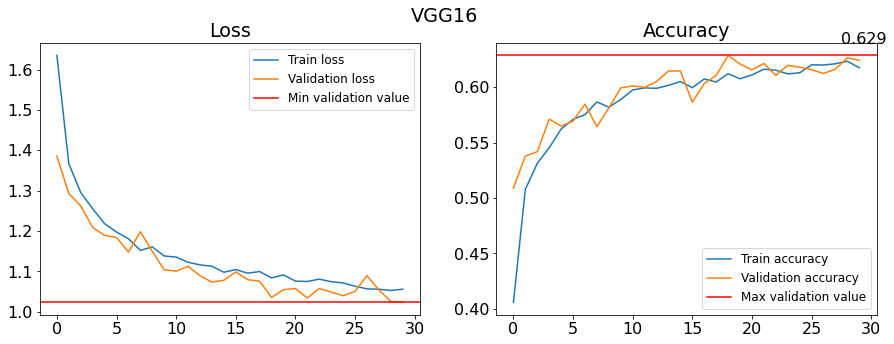

In [406]:
show_final_history(xfer_aug)
plt.suptitle('VGG16')

In [22]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception_base = InceptionV3(input_shape = (88,88,3), include_top = False, weights='imagenet')

In [23]:
incepx_model = add_new_last_layer(inception_base, drop_out=0)
transfer_setup(incepx_model, inception_base)

/Users/jordyns/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
incepx_aug = incepx_model.fit(datagen.flow(X_train, y_train, batch_size=32),
         validation_data=(X_test, y_test),
         steps_per_epoch=len(X_train) // 32, epochs=10)

Epoch 1/10
498/498 [==============================] - 1222s 2s/step - loss: 2.5626 - accuracy: 0.4014 - val_loss: 1.5183 - val_accuracy: 0.4481
Epoch 2/10
498/498 [==============================] - 11475s 23s/step - loss: 1.3416 - accuracy: 0.5121 - val_loss: 1.1434 - val_accuracy: 0.5857
Epoch 3/10
 99/498 [====>.........................] - ETA: 27:18 - loss: 1.2723 - accuracy: 0.5369